In [1]:
import torch
# Verificar si CUDA está disponible
if torch.cuda.is_available():
    # Imprimir el número de GPUs disponibles
    print(torch.cuda.device_count(), "GPU(s) disponibles.")
    # Imprimir el nombre de la GPU actual
    print("GPU actual:", torch.cuda.get_device_name(0))
else:
    print("CUDA no está disponible. Usando CPU.")

1 GPU(s) disponibles.
GPU actual: NVIDIA GeForce RTX 3060 Laptop GPU


In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

c:\Users\yordy\Documents\Developer\neo\neo-api\src\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")


Loading pipeline components...: 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]


In [4]:
prompt = """dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans
"""

In [5]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\yordy\Documents\Developer\neo\neo-api\src\env\Lib\site-packages\diffusers\models\attention_processor.py:1279: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  hidden_states = F.scaled_dot_product_attention(
100%|██████████| 50/50 [00:26<00:00,  1.89it/s]


[PROMPT]:  dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans



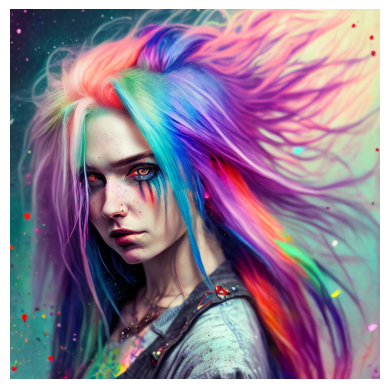

In [6]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [7]:
prompt2 = """dreamlike, Goddess Durga coming down from the heaven with a weapon in one hand and other hand in the pose of blessing. Anger and divine energy
reflecting from her eyes.
She is in the form of a soldier and savior coming to protect the world from misery. She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris
"""

image = pipe(prompt2).images[0]

100%|██████████| 50/50 [00:22<00:00,  2.20it/s]


[PROMPT]:  dreamlike, Goddess Durga coming down from the heaven with a weapon in one hand and other hand in the pose of blessing. Anger and divine energy
reflecting from her eyes.
She is in the form of a soldier and savior coming to protect the world from misery. She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris



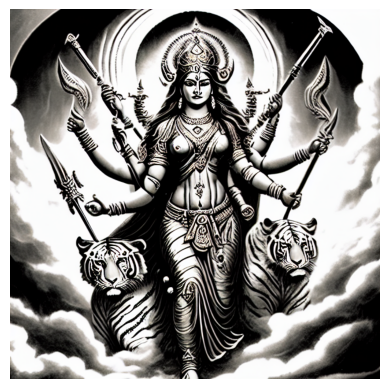

In [8]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

In [9]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [25]:
prompt = "dreamlike, beautiful girl anime with hair colors playing the festival of colors"

params = {}

100%|██████████| 50/50 [00:22<00:00,  2.24it/s]


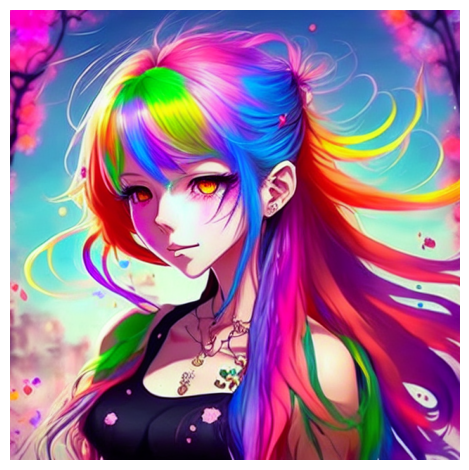

100%|██████████| 100/100 [00:52<00:00,  1.92it/s]


In [26]:
generate_image(pipe, prompt, params)

100%|██████████| 100/100 [00:45<00:00,  2.22it/s]


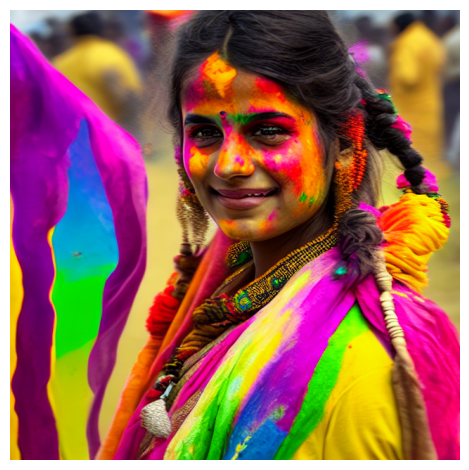

In [12]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

100%|██████████| 100/100 [00:57<00:00,  1.73it/s]


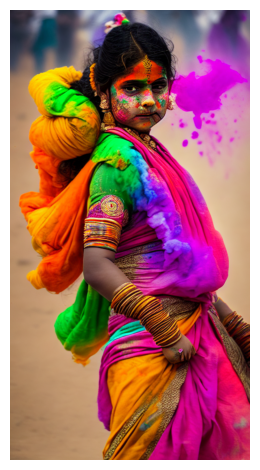

In [13]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

100%|██████████| 100/100 [01:27<00:00,  1.15it/s]


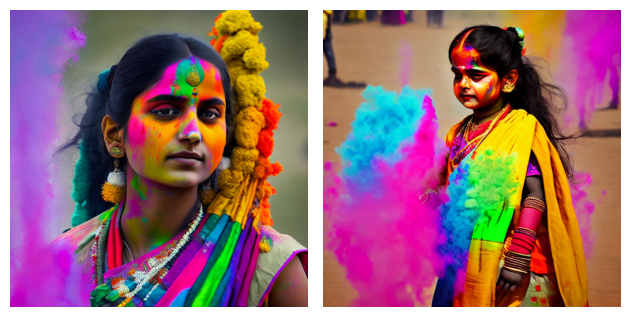

In [14]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

100%|██████████| 100/100 [01:26<00:00,  1.16it/s]


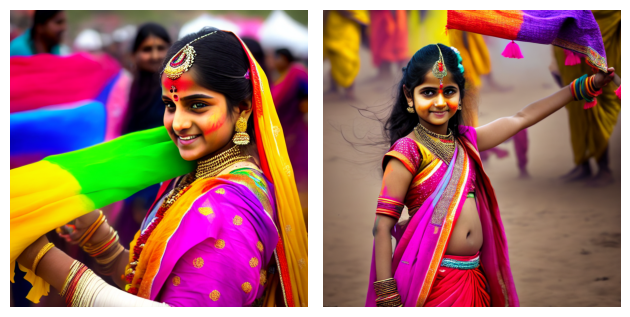

In [15]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)

100%|██████████| 100/100 [01:26<00:00,  1.16it/s]


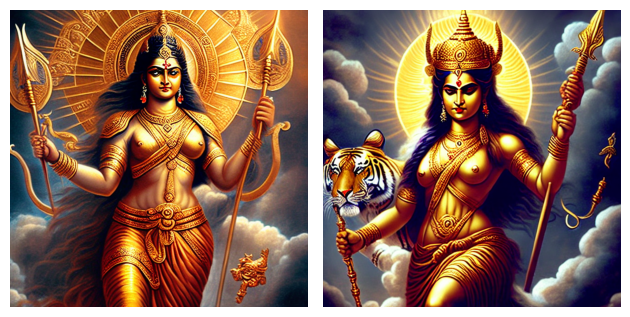

In [16]:
generate_image(pipe, prompt2, params)

In [17]:
def generate_image_interface(prompt, negative_prompt, num_inference_steps=50, weight=640):
  params = {'prompt': prompt, 'num_inference_steps': num_inference_steps, 'num_images_per_prompt':2, 'height':int(1.2*weight),
            'weight': weight, 'negative_prompt': negative_prompt}

  img = pipe(**params).images
  return img[0],img[1]

In [18]:
import gradio as gr

In [19]:
demo = gr.Interface(generate_image_interface, inputs=["text","text",gr.Slider(1,100),gr.Slider(512,640)], outputs=["image","image"])

In [20]:
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\yordy\Documents\Developer\neo\neo-api\src\env\Lib\site-packages\gradio\queueing.py", line 527, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yordy\Documents\Developer\neo\neo-api\src\env\Lib\site-packages\gradio\route_utils.py", line 270, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yordy\Documents\Developer\neo\neo-api\src\env\Lib\site-packages\gradio\blocks.py", line 1847, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yordy\Documents\Developer\neo\neo-api\src\env\Lib\site-packages\gradio\blocks.py", line 1433, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yordy\Documents\Developer\neo\neo-api\src\env\Lib\sit

In [1]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("dreamlike-art/dreamlike-anime-1.0")
pipeline = pipeline.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
image = pipeline("photo anime, masterpiece, high quality, absurdres").images[0]

##simple background, duplicate, retro style, low quality, lowest quality, 1980s, 1990s, 2000s, 2005 2006 2007 2008 2009 2010 2011 2012 2013, bad anatomy,
##bad proportions, extra digits, lowres, username, artist name, error, duplicate, watermark, signature, text, extra digit, fewer digits, worst quality,
##jpeg artifacts, blurry

  0%|          | 0/50 [00:00<?, ?it/s]

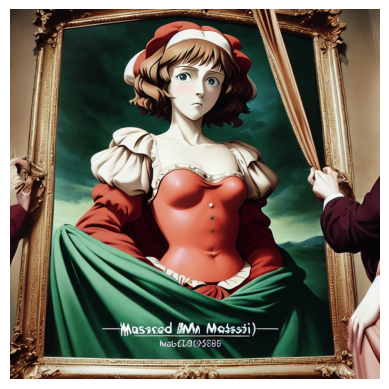

In [7]:
import matplotlib.pyplot as plt
plt.imshow(image);
plt.axis('off');